In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling as ppf
import seaborn as sns

### 1、 读取数据，并将数据转换成 DataFrame 格式

In [2]:
def load_data(file_path):
    '''
    导入数据
    :param file_path: 数据存放路径
    :return: 返回数据列表
    '''
    f = open(file_path)
    data = []
    for line in f.readlines():
        row = []  # 记录每一行
        lines = line.strip().split("\t")
        for x in lines:
            row.append(x)
        data.append(row)
    f.close()
    return data

In [3]:
data = load_data('datingTestSet.txt')
# data
data = pd.DataFrame(data, columns=['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数', '喜欢的程度'])

### 2、 查看数据集

In [4]:
data

,每年的飞行距离,玩视频游戏所耗时间的百分比,每周消费冰激凌的公升数,喜欢的程度
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1
5,72993,10.141740,1.032955,1
6,35948,6.830792,1.213192,3
7,42666,13.276369,0.543880,3
8,67497,8.631577,0.749278,1
9,35483,12.273169,1.508053,3


In [5]:
data = data.astype(float)
# data['喜欢的程度'] = data['喜欢的程度'].astype(int)

In [6]:
data['喜欢的程度'].value_counts()

1.0    342
2.0    331
3.0    327
Name: 喜欢的程度, dtype: int64

In [7]:
ppf.ProfileReport(data)

In [8]:
# 解决sns.pairplot()中文问题
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

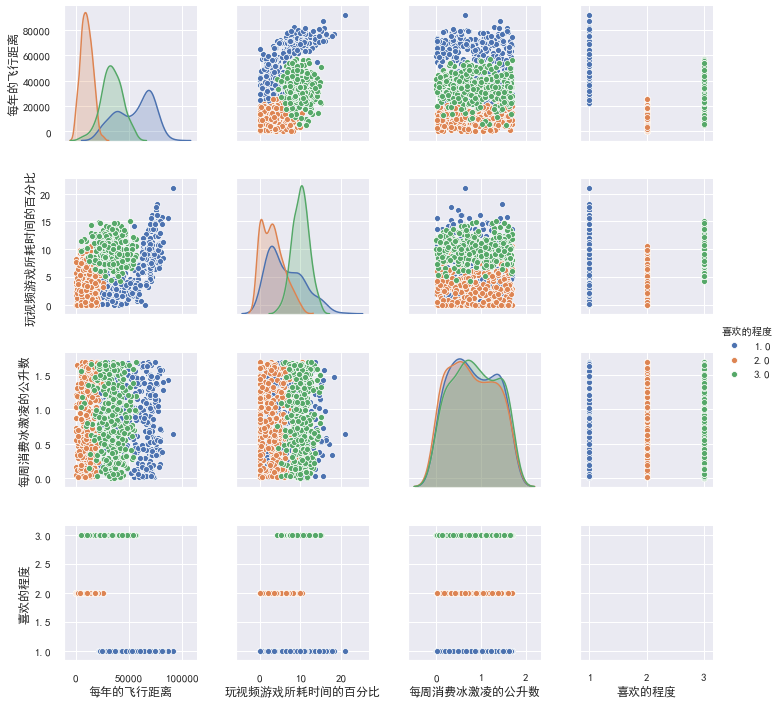

In [9]:
sns.pairplot(data=data, hue='喜欢的程度')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
每年的飞行距离          1000 non-null float64
玩视频游戏所耗时间的百分比    1000 non-null float64
每周消费冰激凌的公升数      1000 non-null float64
喜欢的程度            1000 non-null float64
dtypes: float64(4)
memory usage: 31.3 KB


In [11]:
data.describe()

,每年的飞行距离,玩视频游戏所耗时间的百分比,每周消费冰激凌的公升数,喜欢的程度
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,33635.421000,6.559961,0.832073,1.985000
std,21957.006833,4.243618,0.497239,0.818196
min,0.000000,0.000000,0.001156,1.000000
25%,13796.000000,2.933963,0.408995,1.000000
50%,31669.000000,6.595204,0.809420,2.000000
75%,47716.250000,10.056500,1.272847,3.000000
max,91273.000000,20.919349,1.695517,3.000000


### 3、 根据是否需要，对数据集进行预处理，如：
* 标签编码、处理缺失值、数据标准化；

### 无需标签编码，没有缺失值，需要进行数据标准化

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
trans = StandardScaler()
data_simple = trans.fit_transform(data[['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数']])
data_simple = pd.DataFrame(data, columns=['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数'])
data_simple.head(10)

,每年的飞行距离,玩视频游戏所耗时间的百分比,每周消费冰激凌的公升数
0,40920.0,8.326976,0.953952
1,14488.0,7.153469,1.673904
2,26052.0,1.441871,0.805124
3,75136.0,13.147394,0.428964
4,38344.0,1.669788,0.134296
5,72993.0,10.141740,1.032955
6,35948.0,6.830792,1.213192
7,42666.0,13.276369,0.543880
8,67497.0,8.631577,0.749278
9,35483.0,12.273169,1.508053


In [14]:
data.head(10)

,每年的飞行距离,玩视频游戏所耗时间的百分比,每周消费冰激凌的公升数,喜欢的程度
0,40920.0,8.326976,0.953952,3.0
1,14488.0,7.153469,1.673904,2.0
2,26052.0,1.441871,0.805124,1.0
3,75136.0,13.147394,0.428964,1.0
4,38344.0,1.669788,0.134296,1.0
5,72993.0,10.141740,1.032955,1.0
6,35948.0,6.830792,1.213192,3.0
7,42666.0,13.276369,0.543880,3.0
8,67497.0,8.631577,0.749278,1.0
9,35483.0,12.273169,1.508053,3.0


### 4、 构建训练集和测试集

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(data, test_size=0.2)
train_set.head()

,每年的飞行距离,玩视频游戏所耗时间的百分比,每周消费冰激凌的公升数,喜欢的程度
799,29119.0,3.440948,0.078331,1.0
260,46556.0,2.448235,1.176829,1.0
416,55807.0,3.213631,0.432044,1.0
597,71142.0,10.442780,0.335870,1.0
623,17724.0,6.374475,1.475925,3.0


In [17]:
data_x_train = train_set[['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数']]
data_y_train = train_set['喜欢的程度'].copy()
# data_x_train.head()
data_y_train.head()

799    1.0
260    1.0
416    1.0
597    1.0
623    3.0
Name: 喜欢的程度, dtype: float64

In [18]:
data_x_test = test_set[['每年的飞行距离', '玩视频游戏所耗时间的百分比', '每周消费冰激凌的公升数']]
data_y_test = test_set['喜欢的程度'].copy()

### 5、 使用 8 种不同算法，分别对数据集进行训练，获得分类模型，并用测试集进行测试，最后将预测结果存储到本地文件中

#### 5.1 k近邻算法

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
clf = KNeighborsClassifier()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [21]:
print(res)
print(data_y_test.values)

[3. 2. 3. 3. 2. 2. 1. 1. 1. 2. 1. 1. 3. 3. 2. 1. 2. 2. 2. 1. 3. 1. 2. 2.
 2. 2. 3. 2. 1. 3. 2. 3. 3. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 3. 3.
 3. 3. 1. 1. 2. 3. 3. 2. 1. 1. 2. 3. 1. 1. 2. 2. 3. 3. 3. 1. 3. 3. 1. 2.
 3. 3. 3. 1. 1. 3. 1. 2. 3. 2. 1. 3. 2. 2. 1. 2. 1. 3. 1. 1. 2. 2. 1. 3.
 3. 1. 3. 1. 1. 1. 3. 1. 3. 1. 2. 2. 3. 3. 3. 1. 3. 1. 3. 1. 3. 2. 2. 2.
 3. 3. 1. 3. 3. 3. 2. 2. 2. 1. 2. 3. 1. 1. 3. 3. 2. 2. 3. 2. 2. 2. 2. 3.
 2. 3. 1. 3. 3. 1. 1. 3. 3. 3. 2. 2. 3. 3. 1. 1. 3. 3. 3. 1. 3. 2. 2. 1.
 2. 3. 2. 2. 3. 3. 2. 1. 1. 3. 2. 3. 2. 3. 1. 1. 2. 2. 1. 3. 3. 1. 3. 1.
 2. 1. 3. 2. 3. 2. 2. 3.]
[1. 2. 3. 1. 2. 2. 1. 3. 1. 2. 3. 1. 3. 3. 2. 1. 2. 3. 2. 1. 3. 3. 2. 2.
 2. 2. 3. 3. 1. 3. 2. 3. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 3.
 3. 3. 1. 3. 2. 2. 3. 3. 3. 1. 2. 1. 1. 1. 2. 2. 3. 3. 1. 3. 3. 1. 1. 2.
 1. 1. 3. 1. 1. 1. 1. 2. 3. 2. 1. 3. 2. 2. 1. 2. 1. 3. 3. 1. 2. 2. 1. 3.
 3. 1. 3. 1. 1. 1. 3. 3. 3. 1. 3. 2. 3. 1. 3. 1. 3. 3. 1. 1. 1. 3. 2. 2.
 1. 1. 1. 3. 1. 1. 2. 2. 

In [22]:
accuracy = clf.score(data_x_test, data_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:76%


In [23]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_KNeighbor.csv')

#### 5.2 朴素贝叶斯算法

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
clf = GaussianNB()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [26]:
accuracy = clf.score(data_x_test, data_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:92%


In [27]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_bayes.csv')

#### 5.3 决策树算法

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf = DecisionTreeClassifier()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [30]:
accuracy = clf.score(data_x_test, data_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:92%


In [31]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_tree.csv')

#### 5.4 逻辑回归算法

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [34]:
accuracy = clf.score(data_x_test, data_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:70%


In [35]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_logiRed.csv')

#### 5.5 支持向量机算法

In [36]:
from sklearn.svm import SVC

In [37]:
clf = SVC()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [38]:
accuracy = clf.score(data_x_test, data_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:28%


In [39]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_svm.csv')

#### 5.6 集成方法——随机森林

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf = RandomForestClassifier()
clf.fit(data_x_train, data_y_train)
ret = clf.predict(data_x_test)

In [42]:
accuracy = clf.score(data_x_test, data_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:94%


In [43]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_randForest.csv')

#### 5.7 集成方法——Adaboost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
clf = AdaBoostClassifier()
clf.fit(data_x_train, data_y_train)
ret = clf.predict(data_x_test)

In [46]:
accuracy = clf.score(data_x_test, data_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:76%


In [47]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_Adaboost.csv')

#### 5.8 集成方法——梯度提升树GBDT

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
clf = GradientBoostingClassifier()
clf.fit(data_x_train, data_y_train)
ret = clf.predict(data_x_test)

In [50]:
accuracy = clf.score(data_x_test, data_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:96%


In [51]:
out = data_x_test.copy()
out['y'] = data_y_test
out['prediction'] = res
out.to_csv('data_predict_Adaboost.csv')

### 6、 找一个表现较好的算法，对比舍弃一个不重要特征与否对模型性能的影响

In [52]:
data = data.drop(['每周消费冰激凌的公升数'], axis=1)
data_simple = trans.fit_transform(data[['每年的飞行距离', '玩视频游戏所耗时间的百分比']])
data_simple = pd.DataFrame(data, columns=['每年的飞行距离', '玩视频游戏所耗时间的百分比'])
data_simple.head(10)
# data.head()

,每年的飞行距离,玩视频游戏所耗时间的百分比
0,40920.0,8.326976
1,14488.0,7.153469
2,26052.0,1.441871
3,75136.0,13.147394
4,38344.0,1.669788
5,72993.0,10.141740
6,35948.0,6.830792
7,42666.0,13.276369
8,67497.0,8.631577
9,35483.0,12.273169


In [53]:
train_set, test_set = train_test_split(data, test_size=0.2)
train_set.head()

,每年的飞行距离,玩视频游戏所耗时间的百分比,喜欢的程度
982,2285.0,3.864171,2.0
609,38844.0,4.380388,1.0
211,70758.0,4.324451,1.0
113,28454.0,11.695276,3.0
578,25301.0,3.265444,2.0


In [54]:
data_x_train = train_set[['每年的飞行距离', '玩视频游戏所耗时间的百分比']]
data_y_train = train_set['喜欢的程度'].copy()
data_y_train.head()

982    2.0
609    1.0
211    1.0
113    3.0
578    2.0
Name: 喜欢的程度, dtype: float64

In [55]:
data_x_test = test_set[['每年的飞行距离', '玩视频游戏所耗时间的百分比']]
data_y_test = test_set['喜欢的程度'].copy()

In [56]:
clf = GradientBoostingClassifier()
clf.fit(data_x_train, data_y_train)
res = clf.predict(data_x_test)

In [57]:
accuracy = clf.score(data_x_test, data_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:95%


### 7、 找一个表现较好的算法，舍弃一个不重要特征后，将训练模型可视化

In [58]:
def draw(clf):

    # 网格化
    M, N = 500, 500
    x1_min, x2_min = data_simple[['每年的飞行距离', '玩视频游戏所耗时间的百分比']].min(axis=0)
    x1_max, x2_max = data_simple[['每年的飞行距离', '玩视频游戏所耗时间的百分比']].max(axis=0)
    t1 = np.linspace(x1_min, x1_max, M)
    t2 = np.linspace(x2_min, x2_max, N)
    x1, x2 = np.meshgrid(t1, t2)
    
    # 预测
    x_show = np.stack((x1.flat, x2.flat), axis=1)
    y_predict = clf.predict(x_show)
    
    # 配色
    cm_light = mpl.colors.ListedColormap(["#A0FFA0", "#FFA0A0", "#A0A0FF"])
    cm_dark = mpl.colors.ListedColormap(["g", "r", "b"])
    
    # 绘制预测区域图
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)
    
    # 绘制原始数据点
    plt.scatter(data_simple["每年的飞行距离"], data_simple["玩视频游戏所耗时间的百分比"], label=None,
                c=data["喜欢的程度"], cmap=cm_dark, marker='o', edgecolors='k')
    plt.xlabel("每年的飞行距离")
    plt.ylabel("玩视频游戏所耗时间的百分比")
    
    # 绘制图例
    color = ["g", "r", "b"]
    species = ["1", "2", "3"]
    for i in range(3):
        plt.scatter([], [], c=color[i], s=40, label=species[i])    # 利用空点绘制图例
    plt.legend(loc="best")
    plt.title('data_classfier')

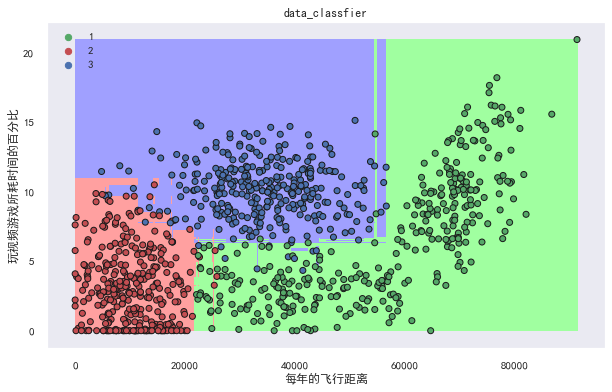

In [59]:
draw(clf)